In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datasets/knn.csv')
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
data.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [4]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [9]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
data.Purchased.unique()

array([0, 1], dtype=int64)

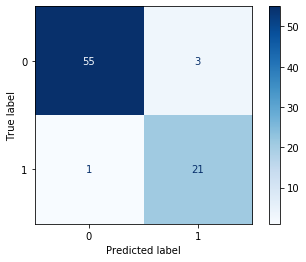

In [26]:
#Visualising confusion matrix in blocks
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)

In [24]:
from mlxtend.plotting import plot_decision_regions
from timeit import default_timer as timer 

Execution time: 2.7471808000000237


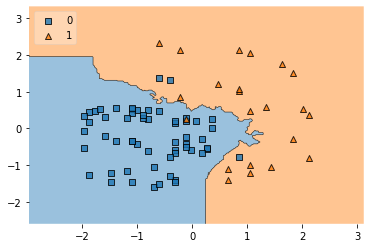

In [29]:
start = timer()
plot_decision_regions(X_test, y_test, clf=clf, legend=2)
print("Execution time:", timer()-start) 





### Q. no. 2) Alter the n_neighbors value and see the difference in the output and also change the type of distance by altering the p value of the distance metric







#### Using k ranging from 1 to 10  and distance p = 1 (Manhattan) 

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
acc = []
k_rng = range(1,11)
for k in k_rng:
    clf = KNeighborsClassifier(n_neighbors = k, p =1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))

[0.875, 0.9, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95]


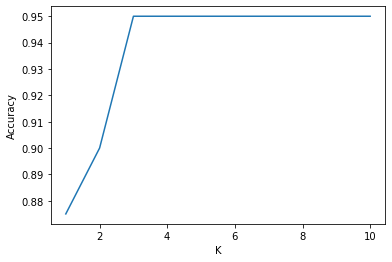

In [21]:
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(k_rng,acc)
print(acc)

#### Using k ranging from 1 to 10 and distance p = 2 (Euclidean)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
acc1 = []
k_rng1 = range(1,11)
for k in k_rng1:
    clf1 = KNeighborsClassifier(n_neighbors = k, p =2)
    clf1.fit(X_train,y_train)
    y_pred1 = clf1.predict(X_test)
    acc1.append(metrics.accuracy_score(y_test, y_pred1))

[0.8625, 0.8875, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95]


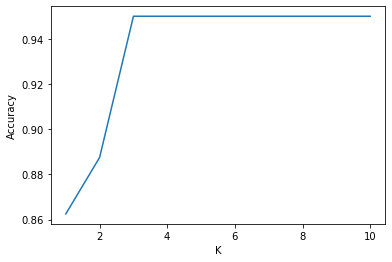

In [23]:
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(k_rng1,acc1)
print(acc1)